# V1.5
**Avtor:** Viktor Rackov

In [5]:
import os, numpy as np, matplotlib.pyplot as plt
os.environ.setdefault("TF_CPP_MIN_LOG_LEVEL", "2")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

NUM_WORDS = 5000
VAL_SPLIT = 10000
EPOCHS = 30
BATCH_SIZE = 512
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
print(tf.__version__)


2.20.0


## Nalaganje in vektorizacija (multi-hot, top 3000)


In [6]:
def vectorize_sequences(sequences, dimension=NUM_WORDS):
    result = np.zeros((len(sequences), dimension), dtype="float32")
    for i, seq in enumerate(sequences):
        idx = np.unique([w for w in seq if 0 <= w < dimension])
        result[i, idx] = 1.0
    return result

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)
x_train_vec = vectorize_sequences(x_train, NUM_WORDS)
x_test_vec  = vectorize_sequences(x_test, NUM_WORDS)
x_train_vec.shape, x_test_vec.shape


((25000, 5000), (25000, 5000))

## Detekcija prekomernega prileganja in testna ocena


In [7]:
# val_loss = np.array(hist['val_loss'], dtype=float)
# loss = np.array(hist['loss'], dtype=float)

# best_epoch = int(np.argmin(val_loss)) + 1
# start_epoch = None
# for i in range(1, len(val_loss)):
#     if (val_loss[i] > val_loss[i-1]) and (loss[i] < loss[i-1]):
#         start_epoch = i + 1
#         break

# print(f"Najboljši epoch po val_loss: {best_epoch}")
# if start_epoch is not None:
#     print(f"Prekomerno prileganje se začne približno pri epohi: {start_epoch}")
# else:
#     print("Jasnega začetka prekomernega prileganja v znotraj treniranih epoh ni.")

# # test_loss, test_acc = model.evaluate(x_test_vec, y_test, verbose=0)
# # print(f"Test — loss: {test_loss:.4f}, acc: {test_acc:.4f}")


# 512 both

In [11]:
x_val, y_val = x_train_vec[:VAL_SPLIT], y_train[:VAL_SPLIT]
partial_x_train, partial_y_train = x_train_vec[VAL_SPLIT:], y_train[VAL_SPLIT:]

model = keras.Sequential([
    keras.Input(shape=(NUM_WORDS,)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.6),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.6),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,823,681 (10.77 MB)

 Trainable params: 2,823,681 (10.77 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    verbose=2
)


Epoch 1/30
30/30 - 1s - 39ms/step - accuracy: 0.7551 - loss: 1.5041 - val_accuracy: 0.8794 - val_loss: 0.9926
Epoch 2/30
30/30 - 1s - 20ms/step - accuracy: 0.8946 - loss: 0.8254 - val_accuracy: 0.8875 - val_loss: 0.7345
Epoch 3/30
30/30 - 1s - 20ms/step - accuracy: 0.9234 - loss: 0.5842 - val_accuracy: 0.8820 - val_loss: 0.6503
Epoch 4/30
30/30 - 1s - 20ms/step - accuracy: 0.9403 - loss: 0.4668 - val_accuracy: 0.8795 - val_loss: 0.6048
Epoch 5/30
30/30 - 1s - 20ms/step - accuracy: 0.9527 - loss: 0.3945 - val_accuracy: 0.8750 - val_loss: 0.5847
Epoch 6/30
30/30 - 1s - 20ms/step - accuracy: 0.9483 - loss: 0.3803 - val_accuracy: 0.8724 - val_loss: 0.5712
Epoch 7/30
30/30 - 1s - 20ms/step - accuracy: 0.9563 - loss: 0.3605 - val_accuracy: 0.8064 - val_loss: 0.7519
Epoch 8/30
30/30 - 1s - 20ms/step - accuracy: 0.9460 - loss: 0.3749 - val_accuracy: 0.8597 - val_loss: 0.6194
Epoch 9/30
30/30 - 1s - 20ms/step - accuracy: 0.9547 - loss: 0.3486 - val_accuracy: 0.8619 - val_loss: 0.5850
Epoch 10/3

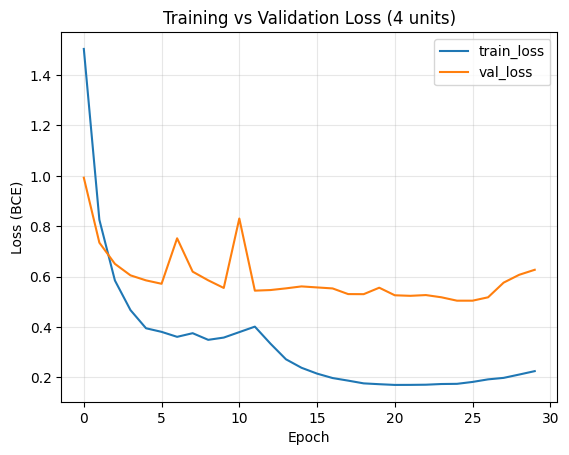

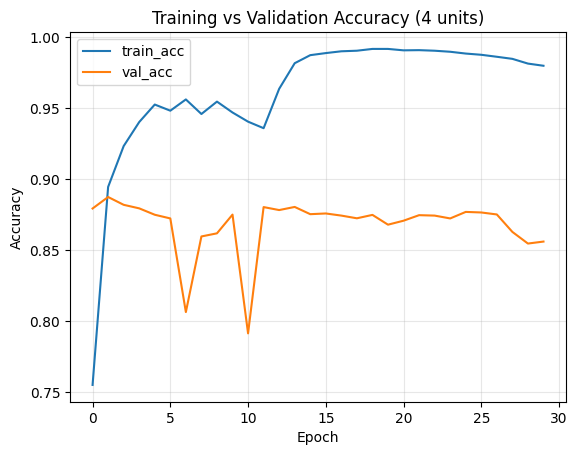

In [13]:
hist = history.history
# Loss
plt.figure()
plt.plot(hist['loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss (BCE)'); plt.title('Training vs Validation Loss (4 units)')
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()

# Accuracy
plt.figure()
plt.plot(hist['accuracy'], label='train_acc')
plt.plot(hist['val_accuracy'], label='val_acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Training vs Validation Accuracy (4 units)')
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()


# 16 NN with both L2 Regularization and dropout


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │        80,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,305 (313.69 KB)

 Trainable params: 80,305 (313.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
30/30 - 0s - 16ms/step - accuracy: 0.5532 - loss: 0.7259 - val_accuracy: 0.7251 - val_loss: 0.6908
Epoch 2/30
30/30 - 0s - 3ms/step - accuracy: 0.6753 - loss: 0.6650 - val_accuracy: 0.8277 - val_loss: 0.6006
Epoch 3/30
30/30 - 0s - 3ms/step - accuracy: 0.7581 - loss: 0.5884 - val_accuracy: 0.8631 - val_loss: 0.5043
Epoch 4/30
30/30 - 0s - 3ms/step - accuracy: 0.8033 - loss: 0.5255 - val_accuracy: 0.8757 - val_loss: 0.4429
Epoch 5/30
30/30 - 0s - 3ms/step - accuracy: 0.8417 - loss: 0.4766 - val_accuracy: 0.8789 - val_loss: 0.3997
Epoch 6/30
30/30 - 0s - 3ms/step - accuracy: 0.8582 - loss: 0.4408 - val_accuracy: 0.8824 - val_loss: 0.3773
Epoch 7/30
30/30 - 0s - 3ms/step - accuracy: 0.8744 - loss: 0.4046 - val_accuracy: 0.8834 - val_loss: 0.3612
Epoch 8/30
30/30 - 0s - 3ms/step - accuracy: 0.8877 - loss: 0.3796 - val_accuracy: 0.8853 - val_loss: 0.3493
Epoch 9/30
30/30 - 0s - 3ms/step - accuracy: 0.8979 - loss: 0.3582 - val_accuracy: 0.8841 - val_loss: 0.3473
Epoch 10/30
30/30 

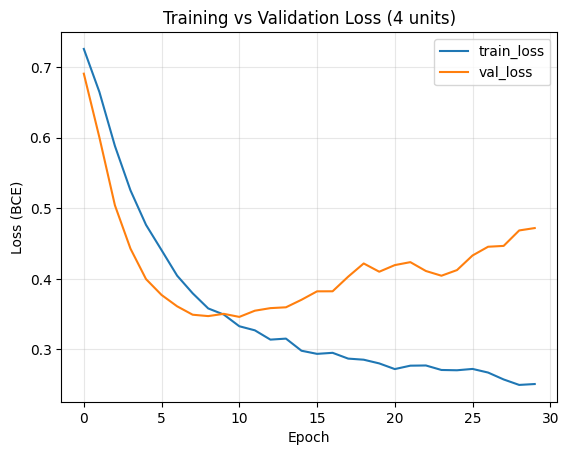

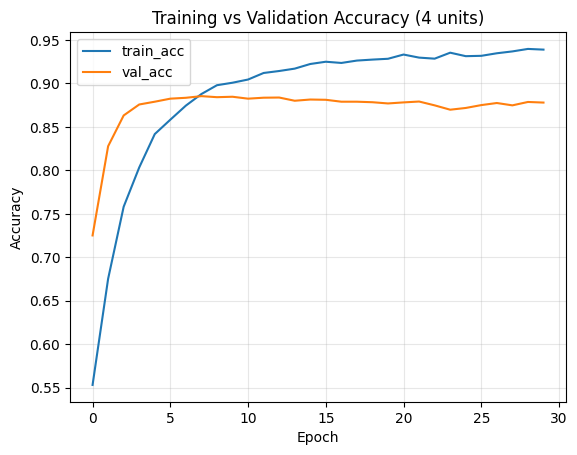

In [14]:
model = keras.Sequential([
    keras.Input(shape=(NUM_WORDS,)),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.6),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.6),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    verbose=2
)

hist = history.history
# Loss
plt.figure()
plt.plot(hist['loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss (BCE)'); plt.title('Training vs Validation Loss (4 units)')
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()

# Accuracy
plt.figure()
plt.plot(hist['accuracy'], label='train_acc')
plt.plot(hist['val_accuracy'], label='val_acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Training vs Validation Accuracy (4 units)')
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()



# NN 4 BOTH

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 4)              │        20,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,029 (78.24 KB)

 Trainable params: 20,029 (78.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
30/30 - 0s - 16ms/step - accuracy: 0.5045 - loss: 0.7055 - val_accuracy: 0.5496 - val_loss: 0.7014
Epoch 2/30
30/30 - 0s - 3ms/step - accuracy: 0.5699 - loss: 0.6852 - val_accuracy: 0.7146 - val_loss: 0.6540
Epoch 3/30
30/30 - 0s - 2ms/step - accuracy: 0.6163 - loss: 0.6481 - val_accuracy: 0.8034 - val_loss: 0.5981
Epoch 4/30
30/30 - 0s - 2ms/step - accuracy: 0.6551 - loss: 0.6052 - val_accuracy: 0.8594 - val_loss: 0.5343
Epoch 5/30
30/30 - 0s - 2ms/step - accuracy: 0.6957 - loss: 0.5742 - val_accuracy: 0.8696 - val_loss: 0.4994
Epoch 6/30
30/30 - 0s - 3ms/step - accuracy: 0.7201 - loss: 0.5497 - val_accuracy: 0.8768 - val_loss: 0.4566
Epoch 7/30
30/30 - 0s - 3ms/step - accuracy: 0.7255 - loss: 0.5410 - val_accuracy: 0.8788 - val_loss: 0.4477
Epoch 8/30
30/30 - 0s - 3ms/step - accuracy: 0.7364 - loss: 0.5210 - val_accuracy: 0.8820 - val_loss: 0.4226
Epoch 9/30
30/30 - 0s - 2ms/step - accuracy: 0.7364 - loss: 0.5185 - val_accuracy: 0.8830 - val_loss: 0.4108
Epoch 10/30
30/30 

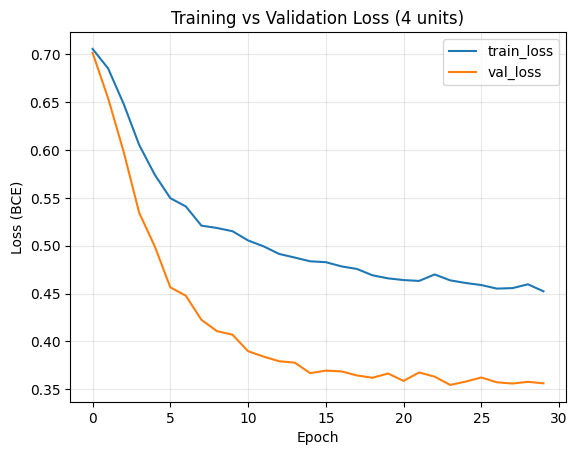

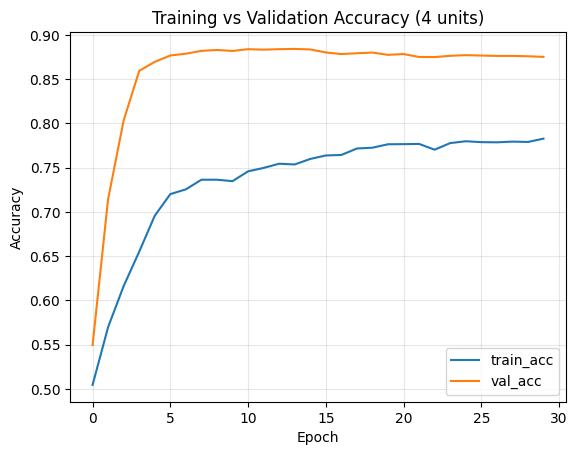

In [15]:
model = keras.Sequential([
    keras.Input(shape=(NUM_WORDS,)),
    layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    verbose=2
)

hist = history.history
# Loss
plt.figure()
plt.plot(hist['loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss (BCE)'); plt.title('Training vs Validation Loss (4 units)')
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()

# Accuracy
plt.figure()
plt.plot(hist['accuracy'], label='train_acc')
plt.plot(hist['val_accuracy'], label='val_acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Training vs Validation Accuracy (4 units)')
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()



### 512 neurons

L2 (λ=0.001): Training becomes more volatile; overfitting is still present, just delayed a bit.

Dropout (p=0.6): Behavior is similar to the baseline, but with slower, smoother changes in the curves.

L2 + Dropout: Still shows sharp jumps and slow trend changes; overfitting persists → the network is too large and doesn’t generalize well.

### 16 neurons

L2 (λ=0.001): Slightly better than the baseline; overfitting rises more slowly, but is still substantial.

Dropout (p≈0.5–0.6): Similar benefits as with 512: slower dynamics, later onset of overfitting; looks more stable but still overfits.

L2 + Dropout: Best among the 16-unit variants—most stable and least overfitting, though not entirely removed.

### 4 neurons

L2 (λ=0.001): Slightly worse than plain 4-unit.

Dropout: Better than plain 4-unit—similar qualitative effect as with larger nets (smoother, slower), but capacity is still low.

L2 + Dropout: Learns slowly and steadily; loss decreases smoothly, no spikes, no clear overfitting



Validation accuracy changes are minimal across all models
